In [25]:
#!pip -q install wfdb
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

In [2]:
mit_dir=r'C:\Users\kramorov.s\Documents\arryth\mit'
file_with_files_to_read='RECORDS_GOOD'
label_desc= {'!':'Ventricular flatter wave', '+':'Rhytm change', 'A':'Atrial premature contraction', 'E':'Ventricular escape beat', 'F':'Fusion of vetricular and normal beat', 'L':'Left bundle branch block beat', 'N':'Normal beat', 'R':'Right bundle branch block beat', 'V':'Prematural ventricular contraction', 'a':'Aberrated atrial premature beat', 'j':'Nodal (junctional) escape beat', 'x':'Non-conducted P-wave (blocked APB)','~':'Signal quality change'}
allowed_labels=list(label_desc.keys())

In [ ]:
signal_number=9
filename = f'{mit_dir}\{str(100 + signal_number)}'
record = wfdb.rdrecord(pn_dir=mit_dir, record_name=filename, sampfrom=180, sampto=4000,)
annotation = wfdb.rdann(pn_dir=mit_dir, record_name=filename, 'atr', sampfrom=180, sampto=4000,shift_samps=True)
#wfdb.plot_wfdb(record=record, annotation=annotation, time_units='seconds',figsize=(15,8))

-------------------------------------------------------------------------------
pydev debugger: CRITICAL WARNING: This version of python seems to be incorrectly compiled (internal generated filenames are not absolute)
pydev debugger: The debugger may still function, but it will work slower and may miss breakpoints.
pydev debugger: Related bug: http://bugs.python.org/issue1666807
-------------------------------------------------------------------------------
Could not connect to 127.0.0.1: 62157
Traceback (most recent call last):
  File "C:\Program Files\JetBrains\PyCharm 2022.2\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_comm.py", line 463, in start_client
    s.connect((host, port))
ConnectionRefusedError: [WinError 10061] Подключение не установлено, т.к. конечный компьютер отверг запрос на подключение
Traceback (most recent call last):
  File "C:\Program Files\JetBrains\PyCharm 2022.2\plugins\python\helpers-pro\jupyter_debug\pydev_jupyter_utils.py", line 81, in attach_to_debug

In [3]:
records_filename = f'{mit_dir}\{file_with_files_to_read}'
with open(records_filename) as f:
    records_to_read = f.read().split('\n')
records_to_read_list=records_to_read[:len(records_to_read)-1]

In [4]:
headers=list()
annotations=list()
all_annotations_symbols=list()
records=list()
for fname in records_to_read_list:
    filename=f'{mit_dir}\{fname}'
    print(f'Обрабатывается файл {fname}')
    hdr=wfdb.io.rdheader(filename, rd_segments=False)
    record = wfdb.rdrecord(filename)
    records.append(record)
    annotation = wfdb.rdann(filename, 'atr', shift_samps=True)
    headers.append(hdr)
    annotations.append(annotation)
    '''all_annotations_symbols=all_annotations_symbols+[f'{annotation.symbol[i]}{annotation.subtype[i]}' for i in range(0, len(annotation.subtype))]'''
    all_annotations_symbols=all_annotations_symbols+[f'{annotation.symbol[i]}' for i in range(0, len(annotation.symbol))]
    #print (f'record_name:{hdr.record_name}, fs={hdr.fs}, sig_len={hdr.sig_len}, sig_name={hdr.sig_name},\
    # baseline={hdr.baseline}, units={hdr.units} ')
# wfdb.show_ann_labels()

Обрабатывается файл 101
Обрабатывается файл 105
Обрабатывается файл 106
Обрабатывается файл 108
Обрабатывается файл 109
Обрабатывается файл 111
Обрабатывается файл 112
Обрабатывается файл 113
Обрабатывается файл 115
Обрабатывается файл 116
Обрабатывается файл 118
Обрабатывается файл 119
Обрабатывается файл 121
Обрабатывается файл 122
Обрабатывается файл 200
Обрабатывается файл 201
Обрабатывается файл 202
Обрабатывается файл 203
Обрабатывается файл 205
Обрабатывается файл 207
Обрабатывается файл 208
Обрабатывается файл 209
Обрабатывается файл 210
Обрабатывается файл 212
Обрабатывается файл 213
Обрабатывается файл 214
Обрабатывается файл 215
Обрабатывается файл 219
Обрабатывается файл 220
Обрабатывается файл 221
Обрабатывается файл 222
Обрабатывается файл 223
Обрабатывается файл 228
Обрабатывается файл 230
Обрабатывается файл 231
Обрабатывается файл 232
Обрабатывается файл 233
Обрабатывается файл 234


In [16]:
# Анализ количества различных эпизодов в выборке

#print(Counter(all_annotations_symbols).keys())
#print(Counter(all_annotations_symbols).values())
#count_dict = dict(Counter(all_annotations_symbols).items())
print(sorted(Counter(all_annotations_symbols).items()))
'''annotations[4].sample array([ 163,  391,  627,  868, 1107, 1343, 1585, 1814, 2039, 2255, 2481, 2703, 2936, 3172, 3406, 3633], dtype=int64),
annotations[4].symbol
subtype
chan
num
aux_note'''

In [5]:
pos=5
print(f'{annotations[4].symbol[pos]}: {annotations[4].sample[pos]}')

L: 1048


In [12]:
len(annotations[5].symbol)


2

In [154]:
start_pos=0
end_pos=343
episode=records[4].p_signal[start_pos:end_pos]

In [40]:
def get_episodes(cur_annotation, cur_data):
    episodes=list()
    episode_labels=list()
    for i in range(2, len(cur_annotation.symbol)-2):
        if cur_annotation.symbol[i] in allowed_labels:
            spike_pos=cur_annotation.sample[i]
            previous_spike=cur_annotation.sample[i-1]
            next_spike=cur_annotation.sample[i+1]
            episode_start_pos=spike_pos-(spike_pos-previous_spike)//2
            episode_end_pos=spike_pos+(next_spike-spike_pos)//2
            episode_lenght=episode_end_pos-episode_start_pos
            #print(f'Эпизод: Символ={cur_annotation.symbol[i]} длина эпизода:{episode_lenght}')
            episodes.append(cur_data[episode_start_pos:episode_end_pos])
            episode_labels.append(cur_annotation.symbol[i])
        else:
            print(f'Пропускаем эпизод, символ_{annotation.symbol[i]}_')
    print(f'Загружены эпизоды: {sorted(Counter(episode_labels).items())}')
    return episodes, episode_labels

In [41]:
episodes, episode_labels=get_episodes(annotations[2],records[2].p_signal)

Загружены эпизоды: [('+', 40), ('N', 1506), ('V', 519), ('~', 29)]


In [57]:
max(episodes[6][:,0])

2.075

Text(0.5, 1.0, 'Интегральный сигнал в скользящем окне')

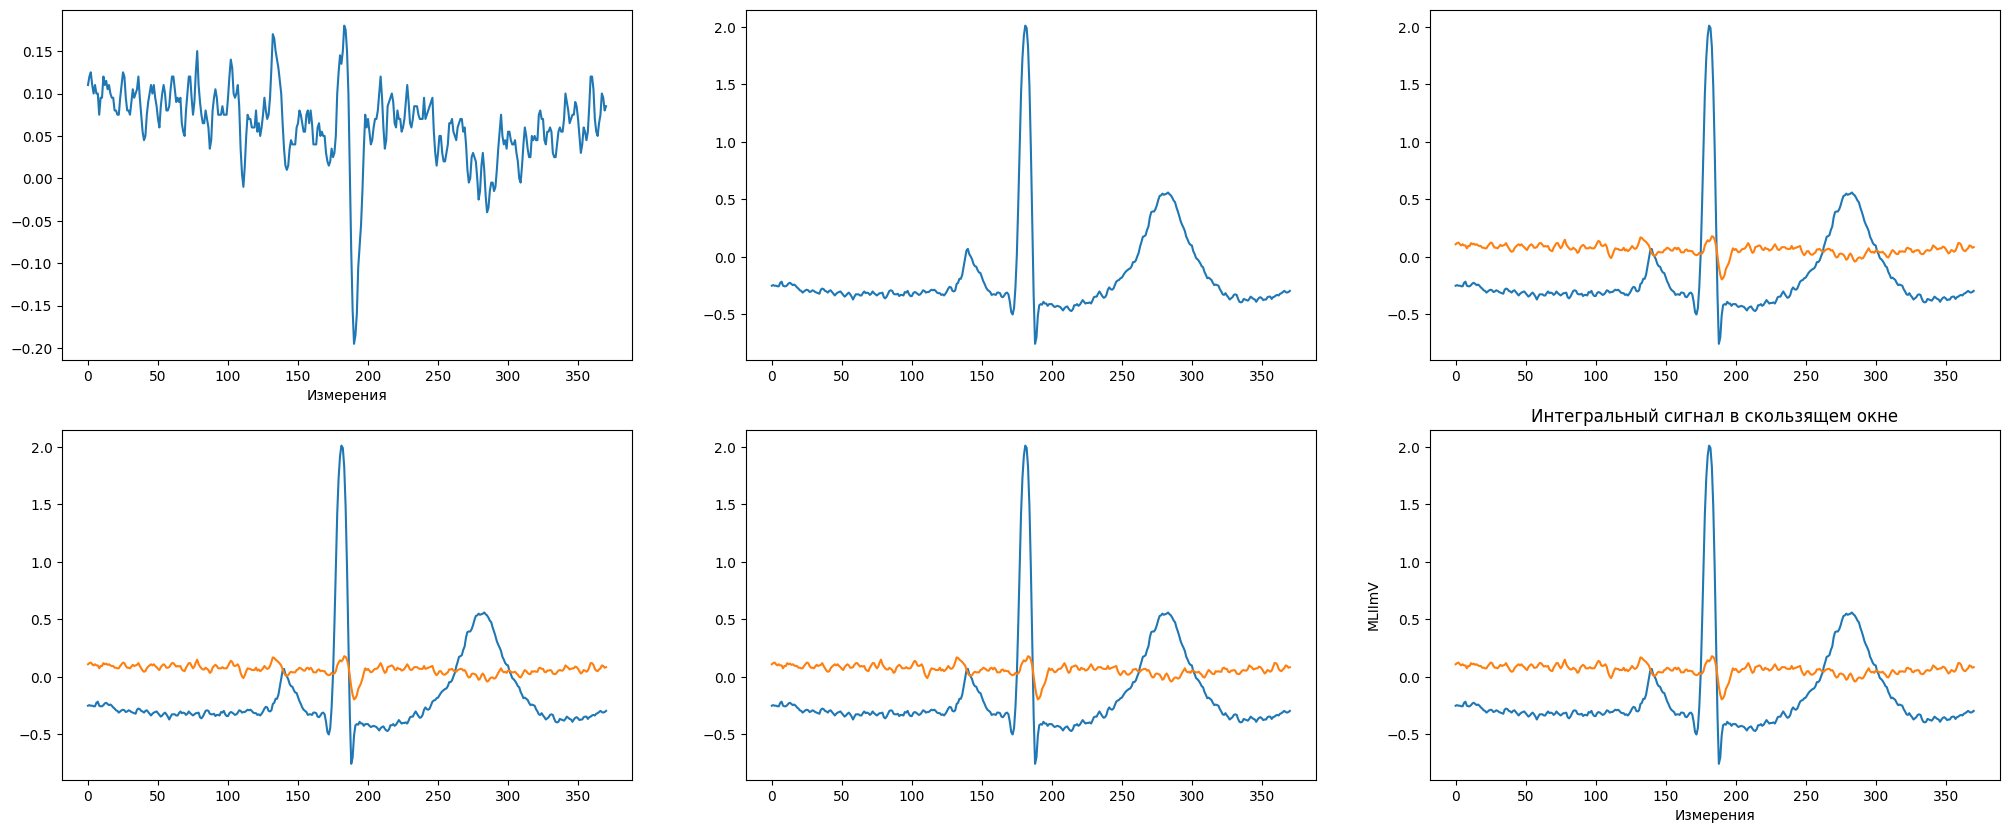

In [65]:
fig, axs = plt.subplots(2, 3, figsize=(25, 10))
#plt.figure(figsize = (4,3), dpi = 100)
#plt.xticks(np.arange(start_pos, end_pos, 30))
axs[0,0].plot(episodes[3][:,1],label='label1')
axs[0,0].set_xlabel('Измерения')
axs[0,1].plot(episodes[3][:,0],label='label2')
axs[0,2].plot(episodes[3])
axs[1,0].plot(episodes[3])
axs[1,1].plot(episodes[3])
axs[1,2].plot(episodes[3])
#plt.plot(episodes[3])
plt.xlabel('Измерения')
plt.ylabel('MLIImV')
plt.title("Интегральный сигнал в скользящем окне")

In [22]:
class Pan_Tompkins_QRS():

  def band_pass_filter(self,signal):
    '''
    Band Pass Filter
    :param signal: input signal
    :return: prcoessed signal

    Methodology/Explaination:
    Bandpass filter is used to attenuate the noise in the input signal.
    To acheive a passband of 5-15 Hz, the input signal is first passed
    through a low pass filter having a cutoff frequency of 11 Hz and then
    through a high pass filter with a cutoff frequency of 5 Hz, thus
    achieving the required thresholds.

    The low pass filter has the recursive equation:
      y(nT) = 2y(nT - T) - y(nT - 2T) + x(nT) - 2x(nT - 6T) + x(nT - 12T)

    The high pass filter has the recursive equation:
      y(nT) = 32x(nT - 16T) - y(nT - T) - x(nT) + x(nT - 32T)
    '''

    # Initialize result
    result = None

    # Create a copy of the input signal
    sig = signal.copy()

    # Apply the low pass filter using the equation given
    for index in range(len(signal)):
      sig[index] = signal[index]

      if (index >= 1):
        sig[index] += 2*sig[index-1]

      if (index >= 2):
        sig[index] -= sig[index-2]

      if (index >= 6):
        sig[index] -= 2*signal[index-6]

      if (index >= 12):
        sig[index] += signal[index-12]

    # Copy the result of the low pass filter
    result = sig.copy()

    # Apply the high pass filter using the equation given
    for index in range(len(signal)):
      result[index] = -1*sig[index]

      if (index >= 1):
        result[index] -= result[index-1]

      if (index >= 16):
        result[index] += 32*sig[index-16]

      if (index >= 32):
        result[index] += sig[index-32]

    # Normalize the result from the high pass filter
    max_val = max(max(result),-min(result))
    result = result/max_val

    return result

  def derivative(self,signal):
    '''
    Derivative Filter
    :param signal: input signal
    :return: prcoessed signal

    Methodology/Explaination:
    The derivative of the input signal is taken to obtain the
    information of the slope of the signal. Thus, the rate of change
    of input is obtain in this step of the algorithm.

    The derivative filter has the recursive equation:
      y(nT) = [-x(nT - 2T) - 2x(nT - T) + 2x(nT + T) + x(nT + 2T)]/(8T)
    '''

    # Initialize result
    result = signal.copy()

    # Apply the derivative filter using the equation given
    for index in range(len(signal)):
      result[index] = 0

      if (index >= 1):
        result[index] -= 2*signal[index-1]

      if (index >= 2):
        result[index] -= signal[index-2]

      if (index >= 2 and index <= len(signal)-2):
        result[index] += 2*signal[index+1]

      if (index >= 2 and index <= len(signal)-3):
        result[index] += signal[index+2]

      result[index] = (result[index]*annotation.fs)/8

    return result

  def squaring(self,signal):
    '''
    Squaring the Signal
    :param signal: input signal
    :return: prcoessed signal

    Methodology/Explaination:
    The squaring process is used to intensify the slope of the
    frequency response curve obtained in the derivative step. This
    step helps in restricting false positives which may be caused
    by T waves in the input signal.

    The squaring filter has the recursive equation:
      y(nT) = [x(nT)]^2
    '''

    # Initialize result
    result = signal.copy()

    # Apply the squaring using the equation given
    for index in range(len(signal)):
      result[index] = signal[index]**2

    return result

  def moving_window_integration(self,signal):
    '''
    Moving Window Integrator
    :param signal: input signal
    :return: prcoessed signal

    Methodology/Explaination:
    The moving window integration process is done to obtain
    information about both the slope and width of the QRS complex.
    A window size of 0.15*(sample frequency) is used for more
    accurate results.

    The moving window integration has the recursive equation:
      y(nT) = [y(nT - (N-1)T) + x(nT - (N-2)T) + ... + x(nT)]/N

      where N is the number of samples in the width of integration
      window.
    '''

    # Initialize result and window size for integration
    result = signal.copy()
    win_size = round(0.150 * annotation.fs)
    sum = 0

    # Calculate the sum for the first N terms
    for j in range(win_size):
      sum += signal[j]/win_size
      result[j] = sum

    # Apply the moving window integration using the equation given
    for index in range(win_size,len(signal)):
      sum += signal[index]/win_size
      sum -= signal[index-win_size]/win_size
      result[index] = sum

    return result

  def solve(self,signal):
    '''
    Solver, Combines all the above functions
    :param signal: input signal
    :return: prcoessed signal

    Methodology/Explaination:
    The peak detection algorithm works on the moving window and bandpass
    filtered signal. So the input signal is first bandpassed, then the
    output of the bandpass filter is given to the derivative function and
    the result is squared. Finally the output of the squaring function
    is given to the moving window integration function and returned.
    '''

    # Convert the input signal into numpy array
    input_signal = signal.iloc[:,1].to_numpy()

    # Bandpass Filter
    global bpass
    bpass = self.band_pass_filter(input_signal.copy())

    # Derivative Function
    global der
    der = self.derivative(bpass.copy())

    # Squaring Function
    global sqr
    sqr = self.squaring(der.copy())

    # Moving Window Integration Function
    global mwin
    mwin = self.moving_window_integration(sqr.copy())

    return mwin

In [26]:
QRS_detector = Pan_Tompkins_QRS()
ecg = pd.DataFrame(np.array([list(range(len(record.adc()))),record.adc()[:,0]]).T,columns=['TimeStamp','ecg'])
output_signal = QRS_detector.solve(ecg)


## Plotting the Signals

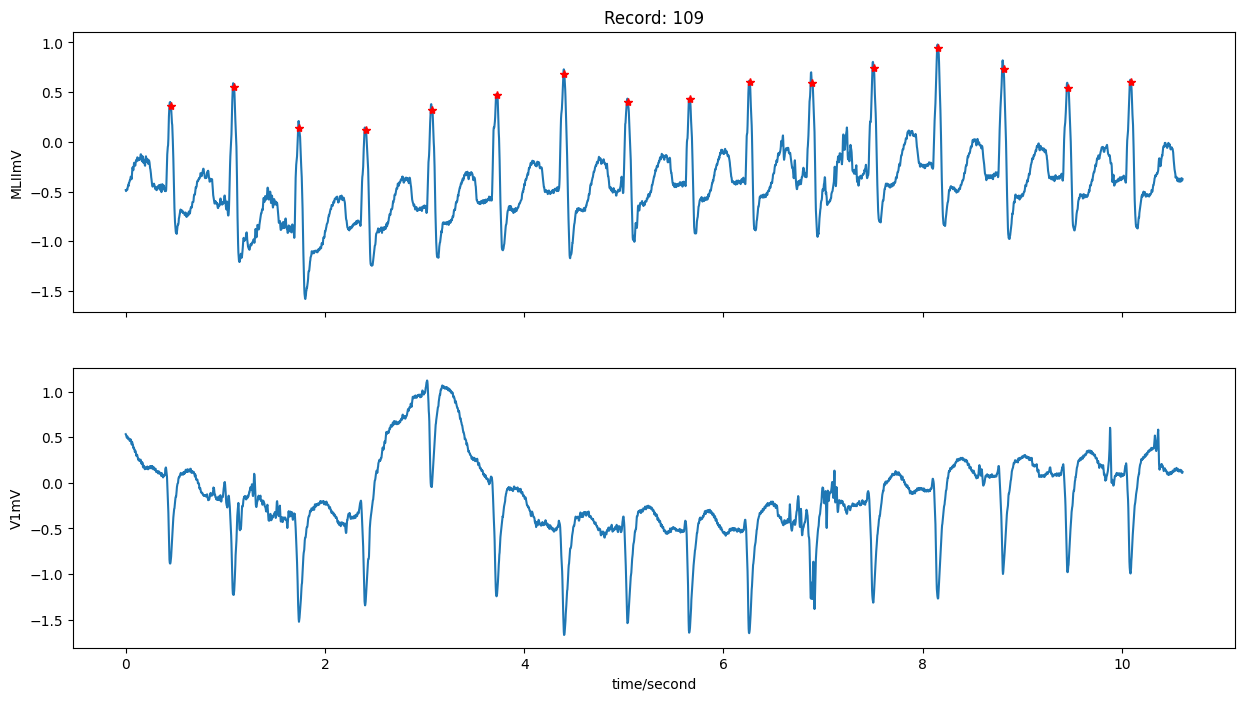

Text(0.5, 1.0, 'Интегральный сигнал в скользящем окне')

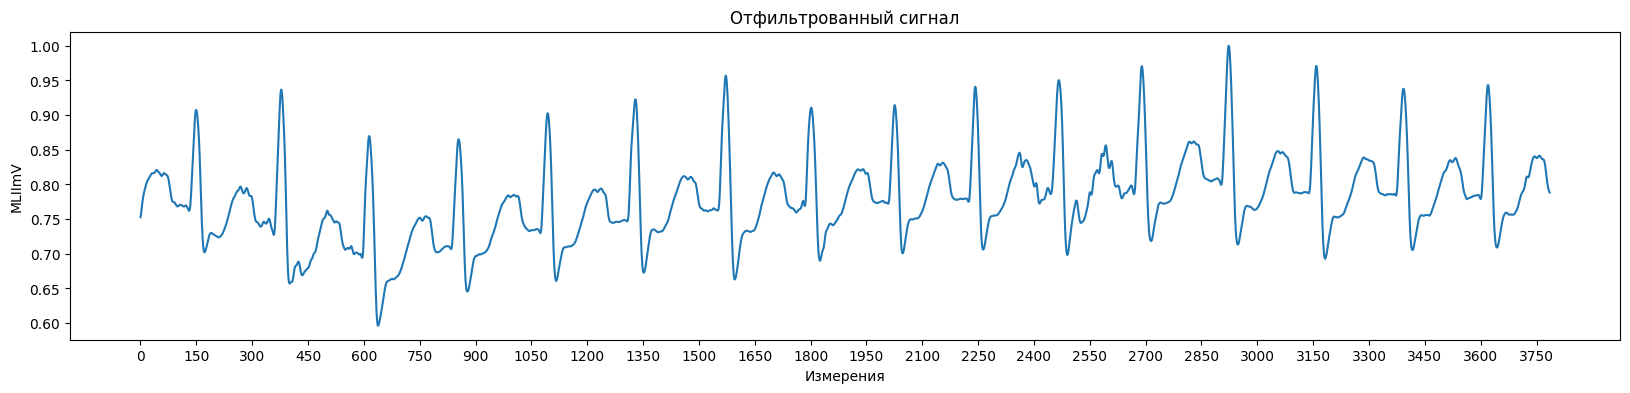

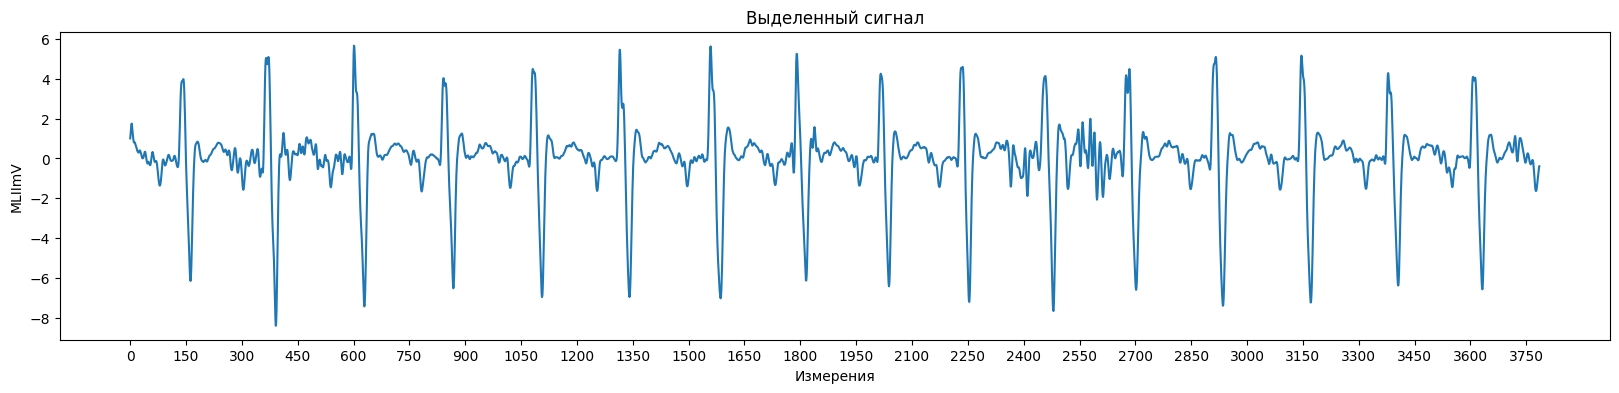

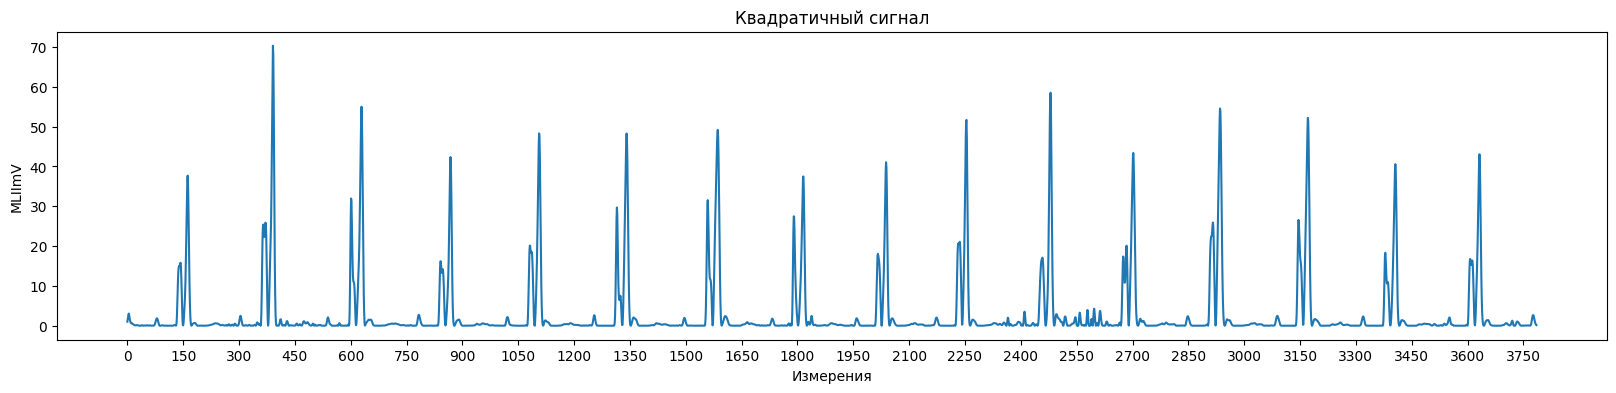

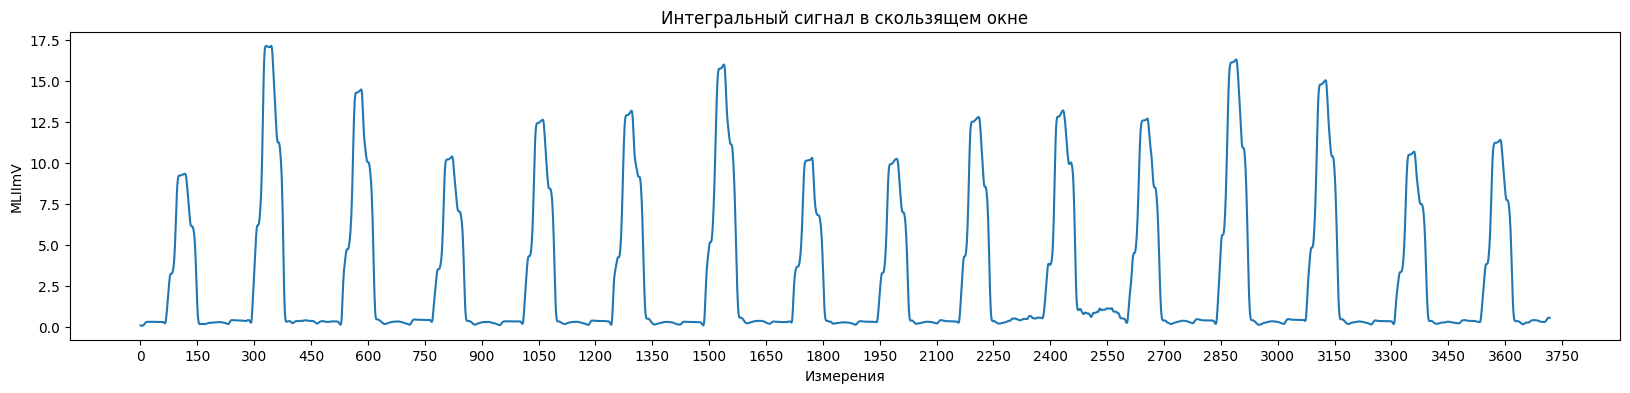

In [28]:
# Выводим Оригинальный сигнал
wfdb.plot_wfdb(record=record, annotation=annotation, time_units='seconds',figsize=(15,8))
# Выводим Отфильтрованный сигнал
plt.figure(figsize = (20,4), dpi = 100)
plt.xticks(np.arange(0, len(bpass)+1, 150))
plt.plot(bpass[32:len(bpass)-2])
plt.xlabel('Измерения')
plt.ylabel('MLIImV')
plt.title("Отфильтрованный сигнал")

# Выводим Выделенный сигнал
plt.figure(figsize = (20,4), dpi = 100)
plt.xticks(np.arange(0, len(der)+1, 150))
plt.plot(der[32:len(der)-2])
plt.xlabel('Измерения')
plt.ylabel('MLIImV')
plt.title("Выделенный сигнал")

# Выводим Квадратичный сигнал
plt.figure(figsize = (20,4), dpi = 100)
plt.xticks(np.arange(0, len(sqr)+1, 150))
plt.plot(sqr[32:len(sqr)-2])
plt.xlabel('Измерения')
plt.ylabel('MLIImV')
plt.title("Квадратичный сигнал")

#  Выводим Интегральный сигнал в скользящем окне
plt.figure(figsize = (20,4), dpi = 100)
plt.xticks(np.arange(0, len(mwin)+1, 150))
plt.plot(mwin[100:len(mwin)-2])
plt.xlabel('Измерения')
plt.ylabel('MLIImV')
plt.title("Интегральный сигнал в скользящем окне")

# Определение частоты сердцебиения

In [29]:
# Importing Libraries
from scipy import signal as sg

class heart_rate():

  def __init__(self,signal,samp_freq):
    '''
    Initialize Variables
    :param signal: input signal
    :param samp_freq: sample frequency of input signal
    '''

    # Initialize variables
    self.RR1, self.RR2, self.probable_peaks, self.r_locs, self.peaks, self.result = ([] for i in range(6))
    self.SPKI, self.NPKI, self.Threshold_I1, self.Threshold_I2, self.SPKF, self.NPKF, self.Threshold_F1, self.Threshold_F2 = (0 for i in range(8))

    self.T_wave = False
    self.m_win = mwin
    self.b_pass = bpass
    self.samp_freq = samp_freq
    self.signal = signal
    self.win_150ms = round(0.15*self.samp_freq)

    self.RR_Low_Limit = 0
    self.RR_High_Limit = 0
    self.RR_Missed_Limit = 0
    self.RR_Average1 = 0


  def approx_peak(self):
    '''
    Approximate peak locations
    '''

    # FFT convolution
    slopes = sg.fftconvolve(self.m_win, np.full((25,), 1) / 25, mode='same')

    # Finding approximate peak locations
    for i in range(round(0.5*self.samp_freq) + 1,len(slopes)-1):
        if (slopes[i] > slopes[i-1]) and (slopes[i+1] < slopes[i]):
            self.peaks.append(i)


  def adjust_rr_interval(self,ind):
    '''
    Adjust RR Interval and Limits
    :param ind: current index in peaks array
    '''

    # Finding the eight most recent RR intervals
    self.RR1 = np.diff(self.peaks[max(0,ind - 8) : ind + 1])/self.samp_freq

    # Calculating RR Averages
    self.RR_Average1 = np.mean(self.RR1)
    RR_Average2 = self.RR_Average1

    # Finding the eight most recent RR intervals lying between RR Low Limit and RR High Limit
    if (ind >= 8):
        for i in range(0, 8):
            if (self.RR_Low_Limit < self.RR1[i] < self.RR_High_Limit):
                self.RR2.append(self.RR1[i])

                if (len(self.RR2) > 8):
                    self.RR2.remove(self.RR2[0])
                    RR_Average2 = np.mean(self.RR2)

    # Adjusting the RR Low Limit and RR High Limit
    if (len(self.RR2) > 7 or ind < 8):
        self.RR_Low_Limit = 0.92 * RR_Average2
        self.RR_High_Limit = 1.16 * RR_Average2
        self.RR_Missed_Limit = 1.66 * RR_Average2


  def searchback(self,peak_val,RRn,sb_win):
      '''
      Searchback
      :param peak_val: peak location in consideration
      :param RRn: the most recent RR interval
      :param sb_win: searchback window
      '''

      # Check if the most recent RR interval is greater than the RR Missed Limit
      if (RRn > self.RR_Missed_Limit):
          # Initialize a window to searchback
          win_rr = self.m_win[peak_val - sb_win + 1 : peak_val + 1]

          # Find the x locations inside the window having y values greater than Threshold I1
          coord = np.asarray(win_rr > self.Threshold_I1).nonzero()[0]

          # Find the x location of the max peak value in the search window
          if (len(coord) > 0):
              for pos in coord:
                  if (win_rr[pos] == max(win_rr[coord])):
                      x_max = pos
                      break
          else:
            x_max = None

          # If the max peak value is found
          if (x_max is not None):
            # Update the thresholds corresponding to moving window integration
            self.SPKI = 0.25 * self.m_win[x_max] + 0.75 * self.SPKI
            self.Threshold_I1 = self.NPKI + 0.25 * (self.SPKI - self.NPKI)
            self.Threshold_I2 = 0.5 * self.Threshold_I1

            # Initialize a window to searchback
            win_rr = self.b_pass[x_max - self.win_150ms: min(len(self.b_pass) -1, x_max)]

            # Find the x locations inside the window having y values greater than Threshold F1
            coord = np.asarray(win_rr > self.Threshold_F1).nonzero()[0]

            # Find the x location of the max peak value in the search window
            if (len(coord) > 0):
              for pos in coord:
                  if (win_rr[pos] == max(win_rr[coord])):
                      r_max = pos
                      break
            else:
              r_max = None

            # If the max peak value is found
            if (r_max is not None):
              # Update the thresholds corresponding to bandpass filter
              if self.b_pass[r_max] > self.Threshold_F2:
                  self.SPKF = 0.25 * self.b_pass[r_max] + 0.75 * self.SPKF
                  self.Threshold_F1 = self.NPKF + 0.25 * (self.SPKF - self.NPKF)
                  self.Threshold_F2 = 0.5 * self.Threshold_F1

                  # Append the probable R peak location
                  self.r_locs.append(r_max)


  def find_t_wave(self,peak_val,RRn,ind,prev_ind):
    '''
    T Wave Identification
    :param peak_val: peak location in consideration
    :param RRn: the most recent RR interval
    :param ind: current index in peaks array
    :param prev_ind: previous index in peaks array
    '''

    if (self.m_win[peak_val] >= self.Threshold_I1):
        if (ind > 0 and 0.20 < RRn < 0.36):
          # Find the slope of current and last waveform detected
          curr_slope = max(np.diff(self.m_win[peak_val - round(self.win_150ms/2) : peak_val + 1]))
          last_slope = max(np.diff(self.m_win[self.peaks[prev_ind] - round(self.win_150ms/2) : self.peaks[prev_ind] + 1]))

          # If current waveform slope is less than half of last waveform slope
          if (curr_slope < 0.5*last_slope):
              # T Wave is found and update noise threshold
              self.T_wave = True
              self.NPKI = 0.125 * self.m_win[peak_val] + 0.875 * self.NPKI

        if (not self.T_wave):
            # T Wave is not found and update signal thresholds
            if (self.probable_peaks[ind] > self.Threshold_F1):
                self.SPKI = 0.125 * self.m_win[peak_val]  + 0.875 * self.SPKI
                self.SPKF = 0.125 * self.b_pass[ind] + 0.875 * self.SPKF

                # Append the probable R peak location
                self.r_locs.append(self.probable_peaks[ind])

            else:
                self.SPKI = 0.125 * self.m_win[peak_val]  + 0.875 * self.SPKI
                self.NPKF = 0.125 * self.b_pass[ind] + 0.875 * self.NPKF

    # Update noise thresholds
    elif (self.m_win[peak_val] < self.Threshold_I1) or (self.Threshold_I1 < self.m_win[peak_val] < self.Threshold_I2):
        self.NPKI = 0.125 * self.m_win[peak_val]  + 0.875 * self.NPKI
        self.NPKF = 0.125 * self.b_pass[ind] + 0.875 * self.NPKF


  def adjust_thresholds(self,peak_val,ind):
    '''
    Adjust Noise and Signal Thresholds During Learning Phase
    :param peak_val: peak location in consideration
    :param ind: current index in peaks array
    '''

    if (self.m_win[peak_val] >= self.Threshold_I1):
        # Update signal threshold
        self.SPKI = 0.125 * self.m_win[peak_val]  + 0.875 * self.SPKI

        if (self.probable_peaks[ind] > self.Threshold_F1):
            self.SPKF = 0.125 * self.b_pass[ind] + 0.875 * self.SPKF

            # Append the probable R peak location
            self.r_locs.append(self.probable_peaks[ind])

        else:
            # Update noise threshold
            self.NPKF = 0.125 * self.b_pass[ind] + 0.875 * self.NPKF

    # Update noise thresholds
    elif (self.m_win[peak_val] < self.Threshold_I2) or (self.Threshold_I2 < self.m_win[peak_val] < self.Threshold_I1):
        self.NPKI = 0.125 * self.m_win[peak_val]  + 0.875 * self.NPKI
        self.NPKF = 0.125 * self.b_pass[ind] + 0.875 * self.NPKF


  def update_thresholds(self):
    '''
    Update Noise and Signal Thresholds for next iteration
    '''

    self.Threshold_I1 = self.NPKI + 0.25 * (self.SPKI - self.NPKI)
    self.Threshold_F1 = self.NPKF + 0.25 * (self.SPKF - self.NPKF)
    self.Threshold_I2 = 0.5 * self.Threshold_I1
    self.Threshold_F2 = 0.5 * self.Threshold_F1
    self.T_wave = False


  def ecg_searchback(self):
    '''
    Searchback in ECG signal to increase efficiency
    '''

    # Filter the unique R peak locations
    self.r_locs = np.unique(np.array(self.r_locs).astype(int))

    # Initialize a window to searchback
    win_200ms = round(0.2*self.samp_freq)

    for r_val in self.r_locs:
        coord = np.arange(r_val - win_200ms, min(len(self.signal), r_val + win_200ms + 1), 1)

        # Find the x location of the max peak value
        if (len(coord) > 0):
          for pos in coord:
              if (self.signal[pos] == max(self.signal[coord])):
                  x_max = pos
                  break
        else:
          x_max = None

        # Append the peak location
        if (x_max is not None):
          self.result.append(x_max)


  def find_r_peaks(self):
    '''
    R Peak Detection
    '''

    # Find approximate peak locations
    self.approx_peak()

    # Iterate over possible peak locations
    for ind in range(len(self.peaks)):

        # Initialize the search window for peak detection
        peak_val = self.peaks[ind]
        win_300ms = np.arange(max(0, self.peaks[ind] - self.win_150ms), min(self.peaks[ind] + self.win_150ms, len(self.b_pass)-1), 1)
        max_val = max(self.b_pass[win_300ms], default = 0)

        # Find the x location of the max peak value
        if (max_val != 0):
          x_coord = np.asarray(self.b_pass == max_val).nonzero()
          self.probable_peaks.append(x_coord[0][0])

        if (ind < len(self.probable_peaks) and ind != 0):
            # Adjust RR interval and limits
            self.adjust_rr_interval(ind)

            # Adjust thresholds in case of irregular beats
            if (self.RR_Average1 < self.RR_Low_Limit or self.RR_Average1 > self.RR_Missed_Limit):
                self.Threshold_I1 /= 2
                self.Threshold_F1 /= 2

            RRn = self.RR1[-1]

            # Searchback
            self.searchback(peak_val,RRn,round(RRn*self.samp_freq))

            # T Wave Identification
            self.find_t_wave(peak_val,RRn,ind,ind-1)

        else:
          # Adjust threholds
          self.adjust_thresholds(peak_val,ind)

        # Update threholds for next iteration
        self.update_thresholds()

    # Searchback in ECG signal
    self.ecg_searchback()

    return self.result

Частота сердечных сокращений 99.9383096853794 BPM


Text(0.5, 1.0, 'Пики участка R')

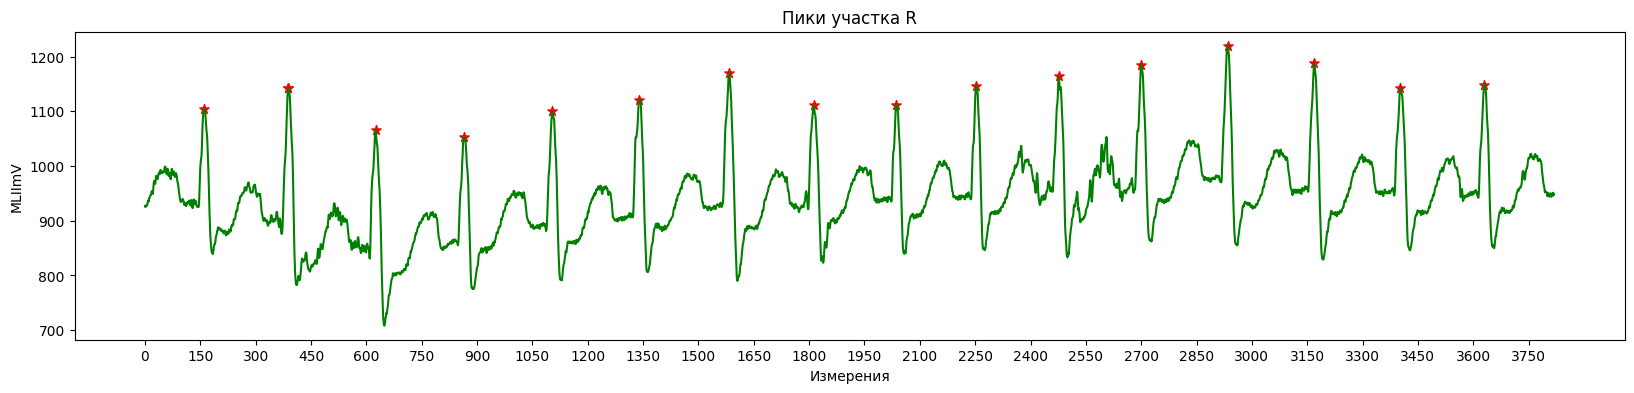

In [32]:
# Convert ecg signal to numpy array
signal = ecg.iloc[:,1].to_numpy()

# Find the R peak locations
hr = heart_rate(signal,annotation.fs)
result = hr.find_r_peaks()
result = np.array(result)

# Clip the x locations less than 0 (Learning Phase)
result = result[result > 0]

# Calculate the heart rate
heartRate = (60*annotation.fs)/np.average(np.diff(result[1:]))
print("Частота сердечных сокращений",heartRate, "BPM")

# Plotting the R peak locations in ECG signal
plt.figure(figsize = (20,4), dpi = 100)
plt.xticks(np.arange(0, len(signal)+1, 150))
plt.plot(signal, color = 'green')
plt.scatter(result, signal[result], color = 'red', s = 50, marker= '*')
plt.xlabel('Измерения')
plt.ylabel('MLIImV')
plt.title("Пики участка R")

Text(0, 0.5, 'MLIImV')

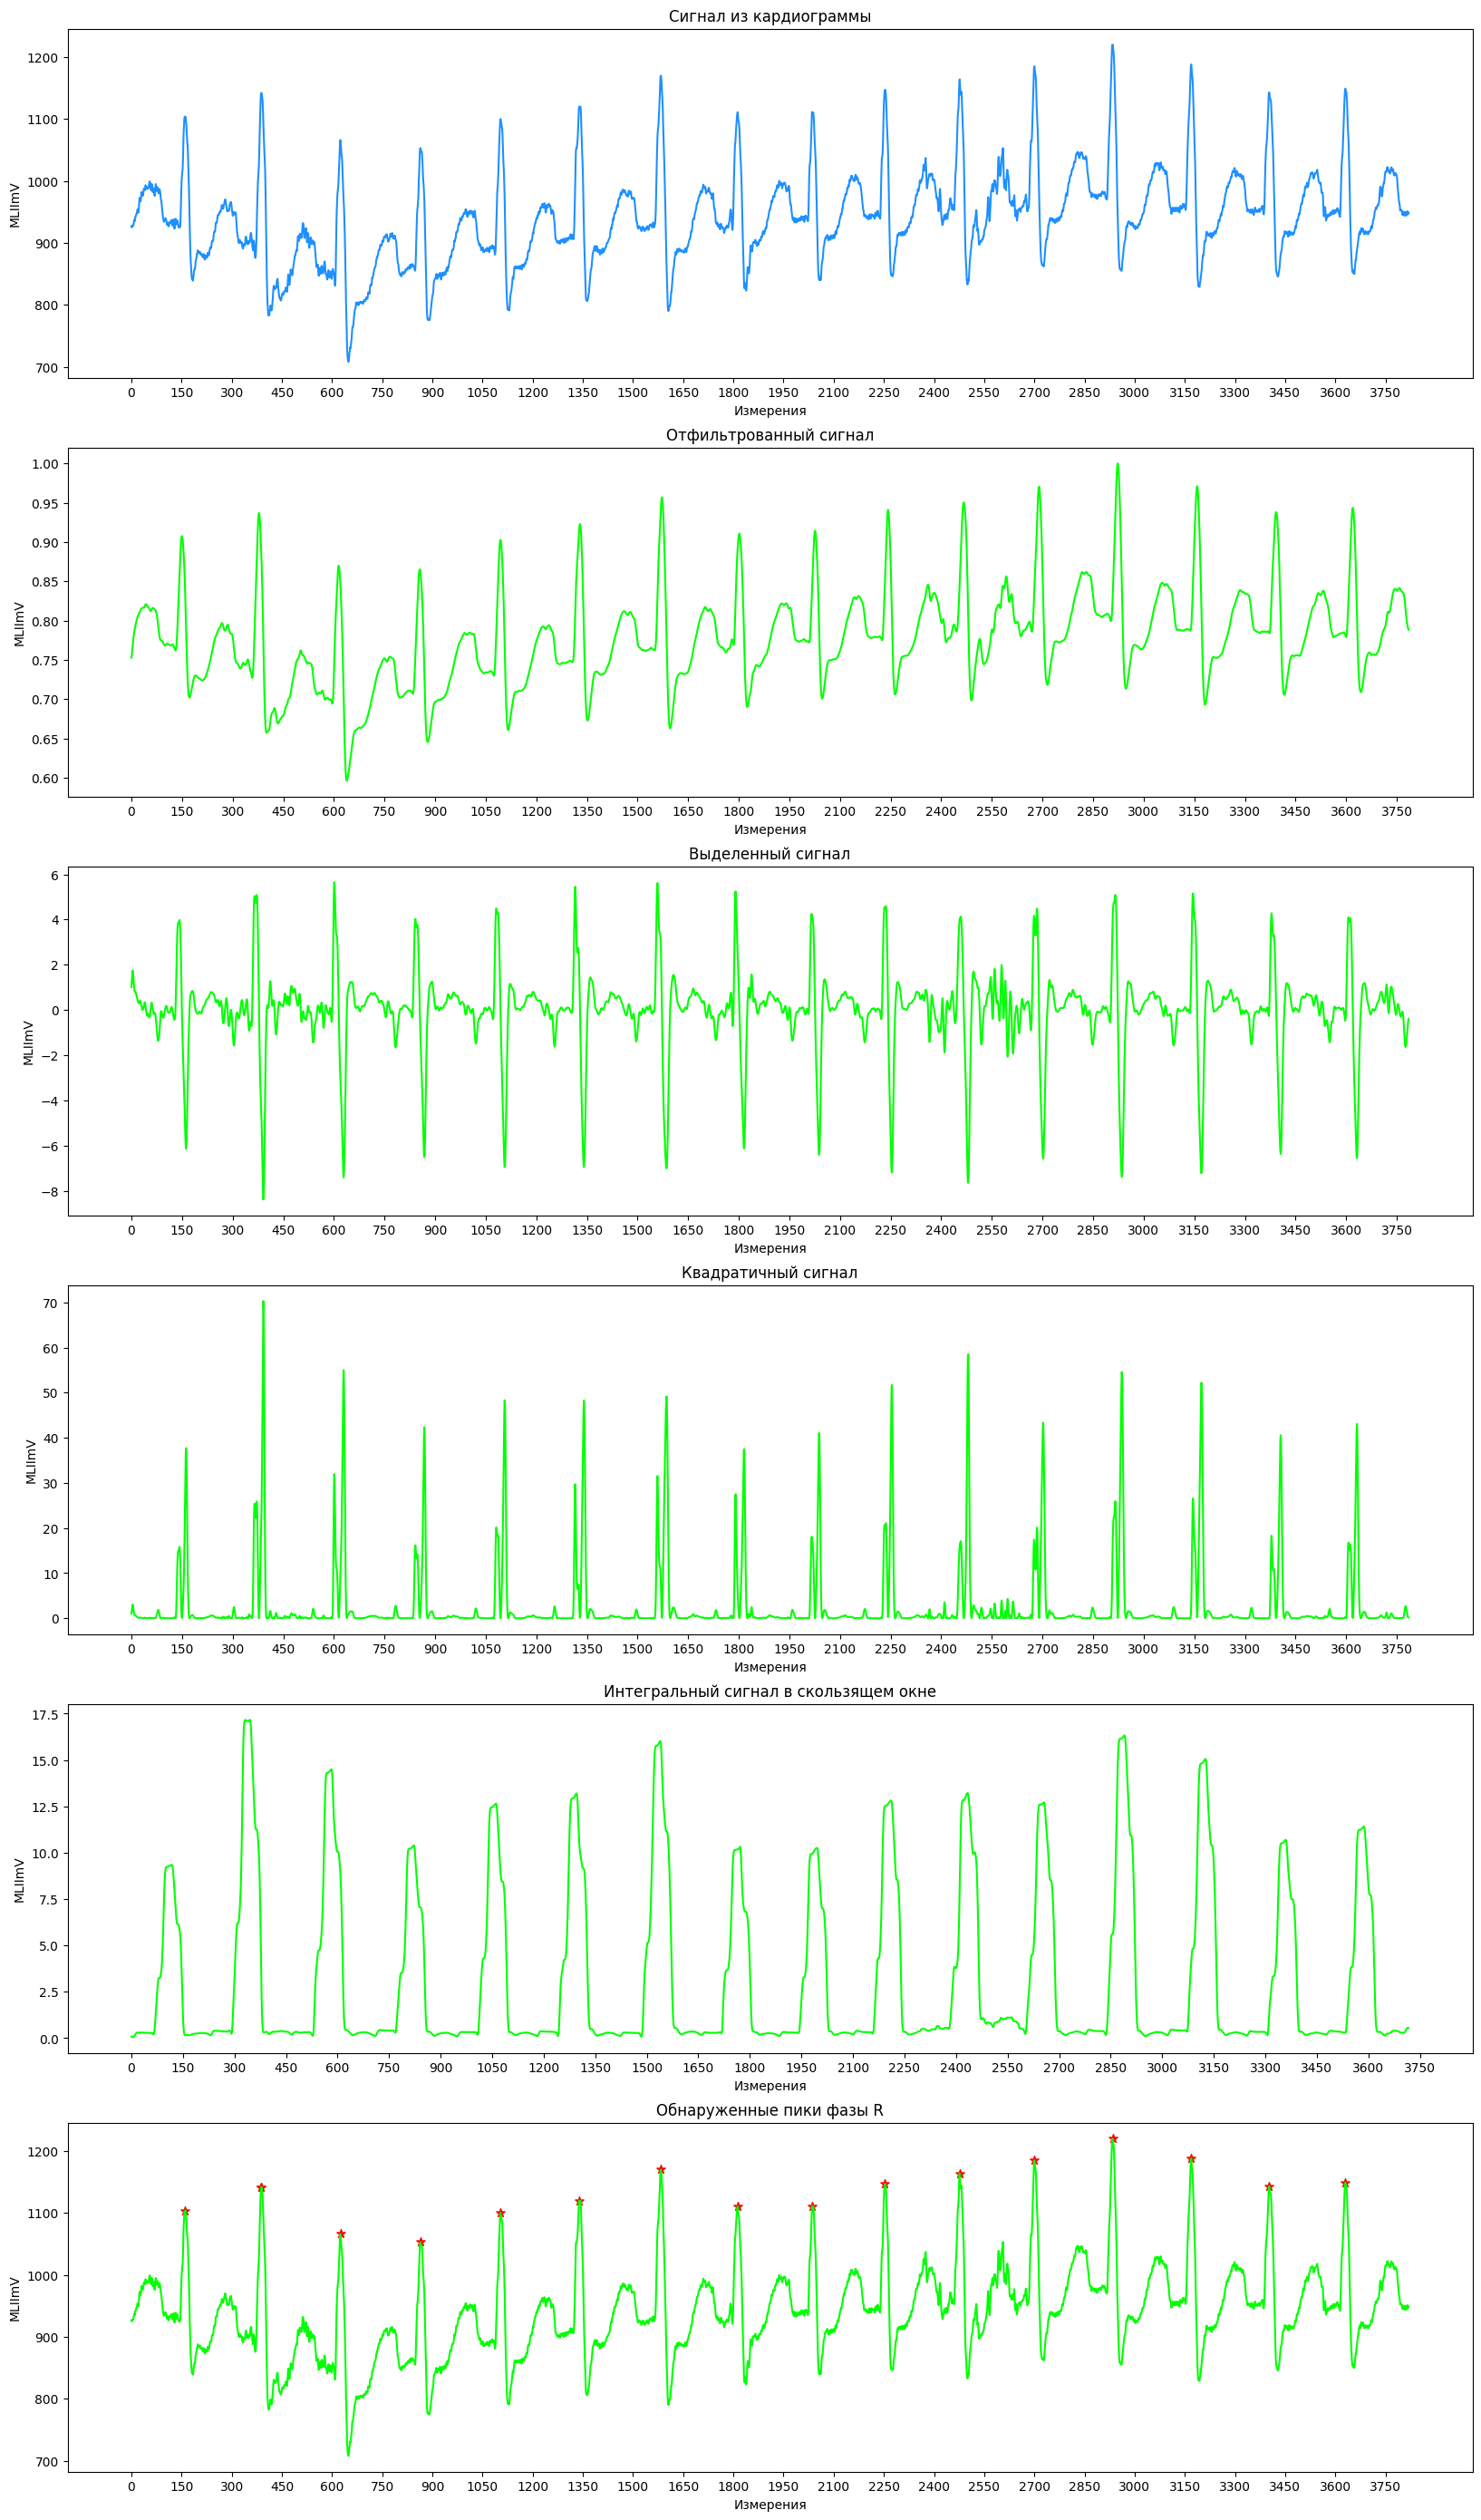

In [42]:
# Creating subplots for the required signals
fig, (axis0, axis1, axis2, axis3, axis4, axis5) = plt.subplots(nrows=6, figsize = (20,35), dpi = 100)

# Plotting original ECG signal
axis0.xaxis.set_ticks(np.arange(0, len(ecg)+1, 150))
axis0.plot(ecg.iloc[:,1], color = 'dodgerblue')
axis0.set_title("Сигнал из кардиограммы")
axis0.set_xlabel('Измерения')
axis0.set_ylabel('MLIImV')

# Plotting bandpassed signal
axis1.xaxis.set_ticks(np.arange(0, len(bpass)+1, 150))
axis1.plot(bpass[32:len(bpass)-2], color = 'lime')
axis1.set_title("Отфильтрованный сигнал")
axis1.set_xlabel('Измерения')
axis1.set_ylabel('MLIImV')

# Plotting derived signal
axis2.xaxis.set_ticks(np.arange(0, len(der)+1, 150))
axis2.plot(der[32:len(der)-2], color = 'lime')
axis2.set_title("Выделенный сигнал")
axis2.set_xlabel('Измерения')
axis2.set_ylabel('MLIImV')

# Plotting squared signal
axis3.xaxis.set_ticks(np.arange(0, len(sqr)+1, 150))
axis3.plot(sqr[32:len(sqr)-2], color = 'lime')
axis3.set_title("Квадратичный сигнал")
axis3.set_xlabel('Измерения')
axis3.set_ylabel('MLIImV')

# Plotting moving window integrated signal
axis4.xaxis.set_ticks(np.arange(0, len(mwin)+1, 150))
axis4.plot(mwin[100:len(mwin)-2], color = 'lime')
axis4.set_title("Интегральный сигнал в скользящем окне")
axis4.set_xlabel('Измерения')
axis4.set_ylabel('MLIImV')

# Plotting R peak locations
axis5.xaxis.set_ticks(np.arange(0, len(signal)+1, 150))
axis5.plot(signal, color = 'lime')
axis5.scatter(result, signal[result], color = 'red', s = 50, marker= '*')
axis5.set_title("Обнаруженные пики фазы R")
axis5.set_xlabel('Измерения')
axis5.set_ylabel('MLIImV')

In [79]:
max(sqr[32:len(sqr)-2])
max(ecg.iloc[:,1])
sqr_coeff=(max(ecg[32:len(ecg)-2].ecg)-min(ecg[32:len(ecg)-2].ecg))/((max(sqr[32:len(sqr)-2]))-min(sqr[32:len(sqr)-2]))
#sqr_offset=(max(sqr[32:len(sqr)-2]))-(min(sqr[32:len(sqr)-2]))
sqr_offset=(min(ecg[32:len(ecg)-2].ecg))

In [74]:
print(max(ecg[32:len(ecg)-2].ecg)-min(ecg[32:len(ecg)-2].ecg))

512


In [72]:
min(ecg[32:len(ecg)-2].ecg)

708

In [57]:
print(f'SQR {min(sqr[32:len(sqr)-2])} to {max(sqr[32:len(sqr)-2])}')
print(f'ECG {min(ecg.iloc[:,1])} to {max(ecg.iloc[:,1])}')


SQR 1.4981384091825955e-07 to 70.30006465577983
ECG 708 to 1220


In [84]:
mwin[100:130]

array([0.07671414, 0.06960709, 0.063611  , 0.0591661 , 0.0571775 ,
       0.05840708, 0.06393705, 0.07547449, 0.09384675, 0.11836596,
       0.14739184, 0.17868887, 0.20969857, 0.23775826, 0.26095961,
       0.27786661, 0.28804045, 0.29276661, 0.29431189, 0.29465295,
       0.29471385, 0.29474315, 0.29481239, 0.29492419, 0.29499288,
       0.29501737, 0.29527064, 0.29597799, 0.29693559, 0.29767287])

Text(0, 0.5, 'MLIImV')

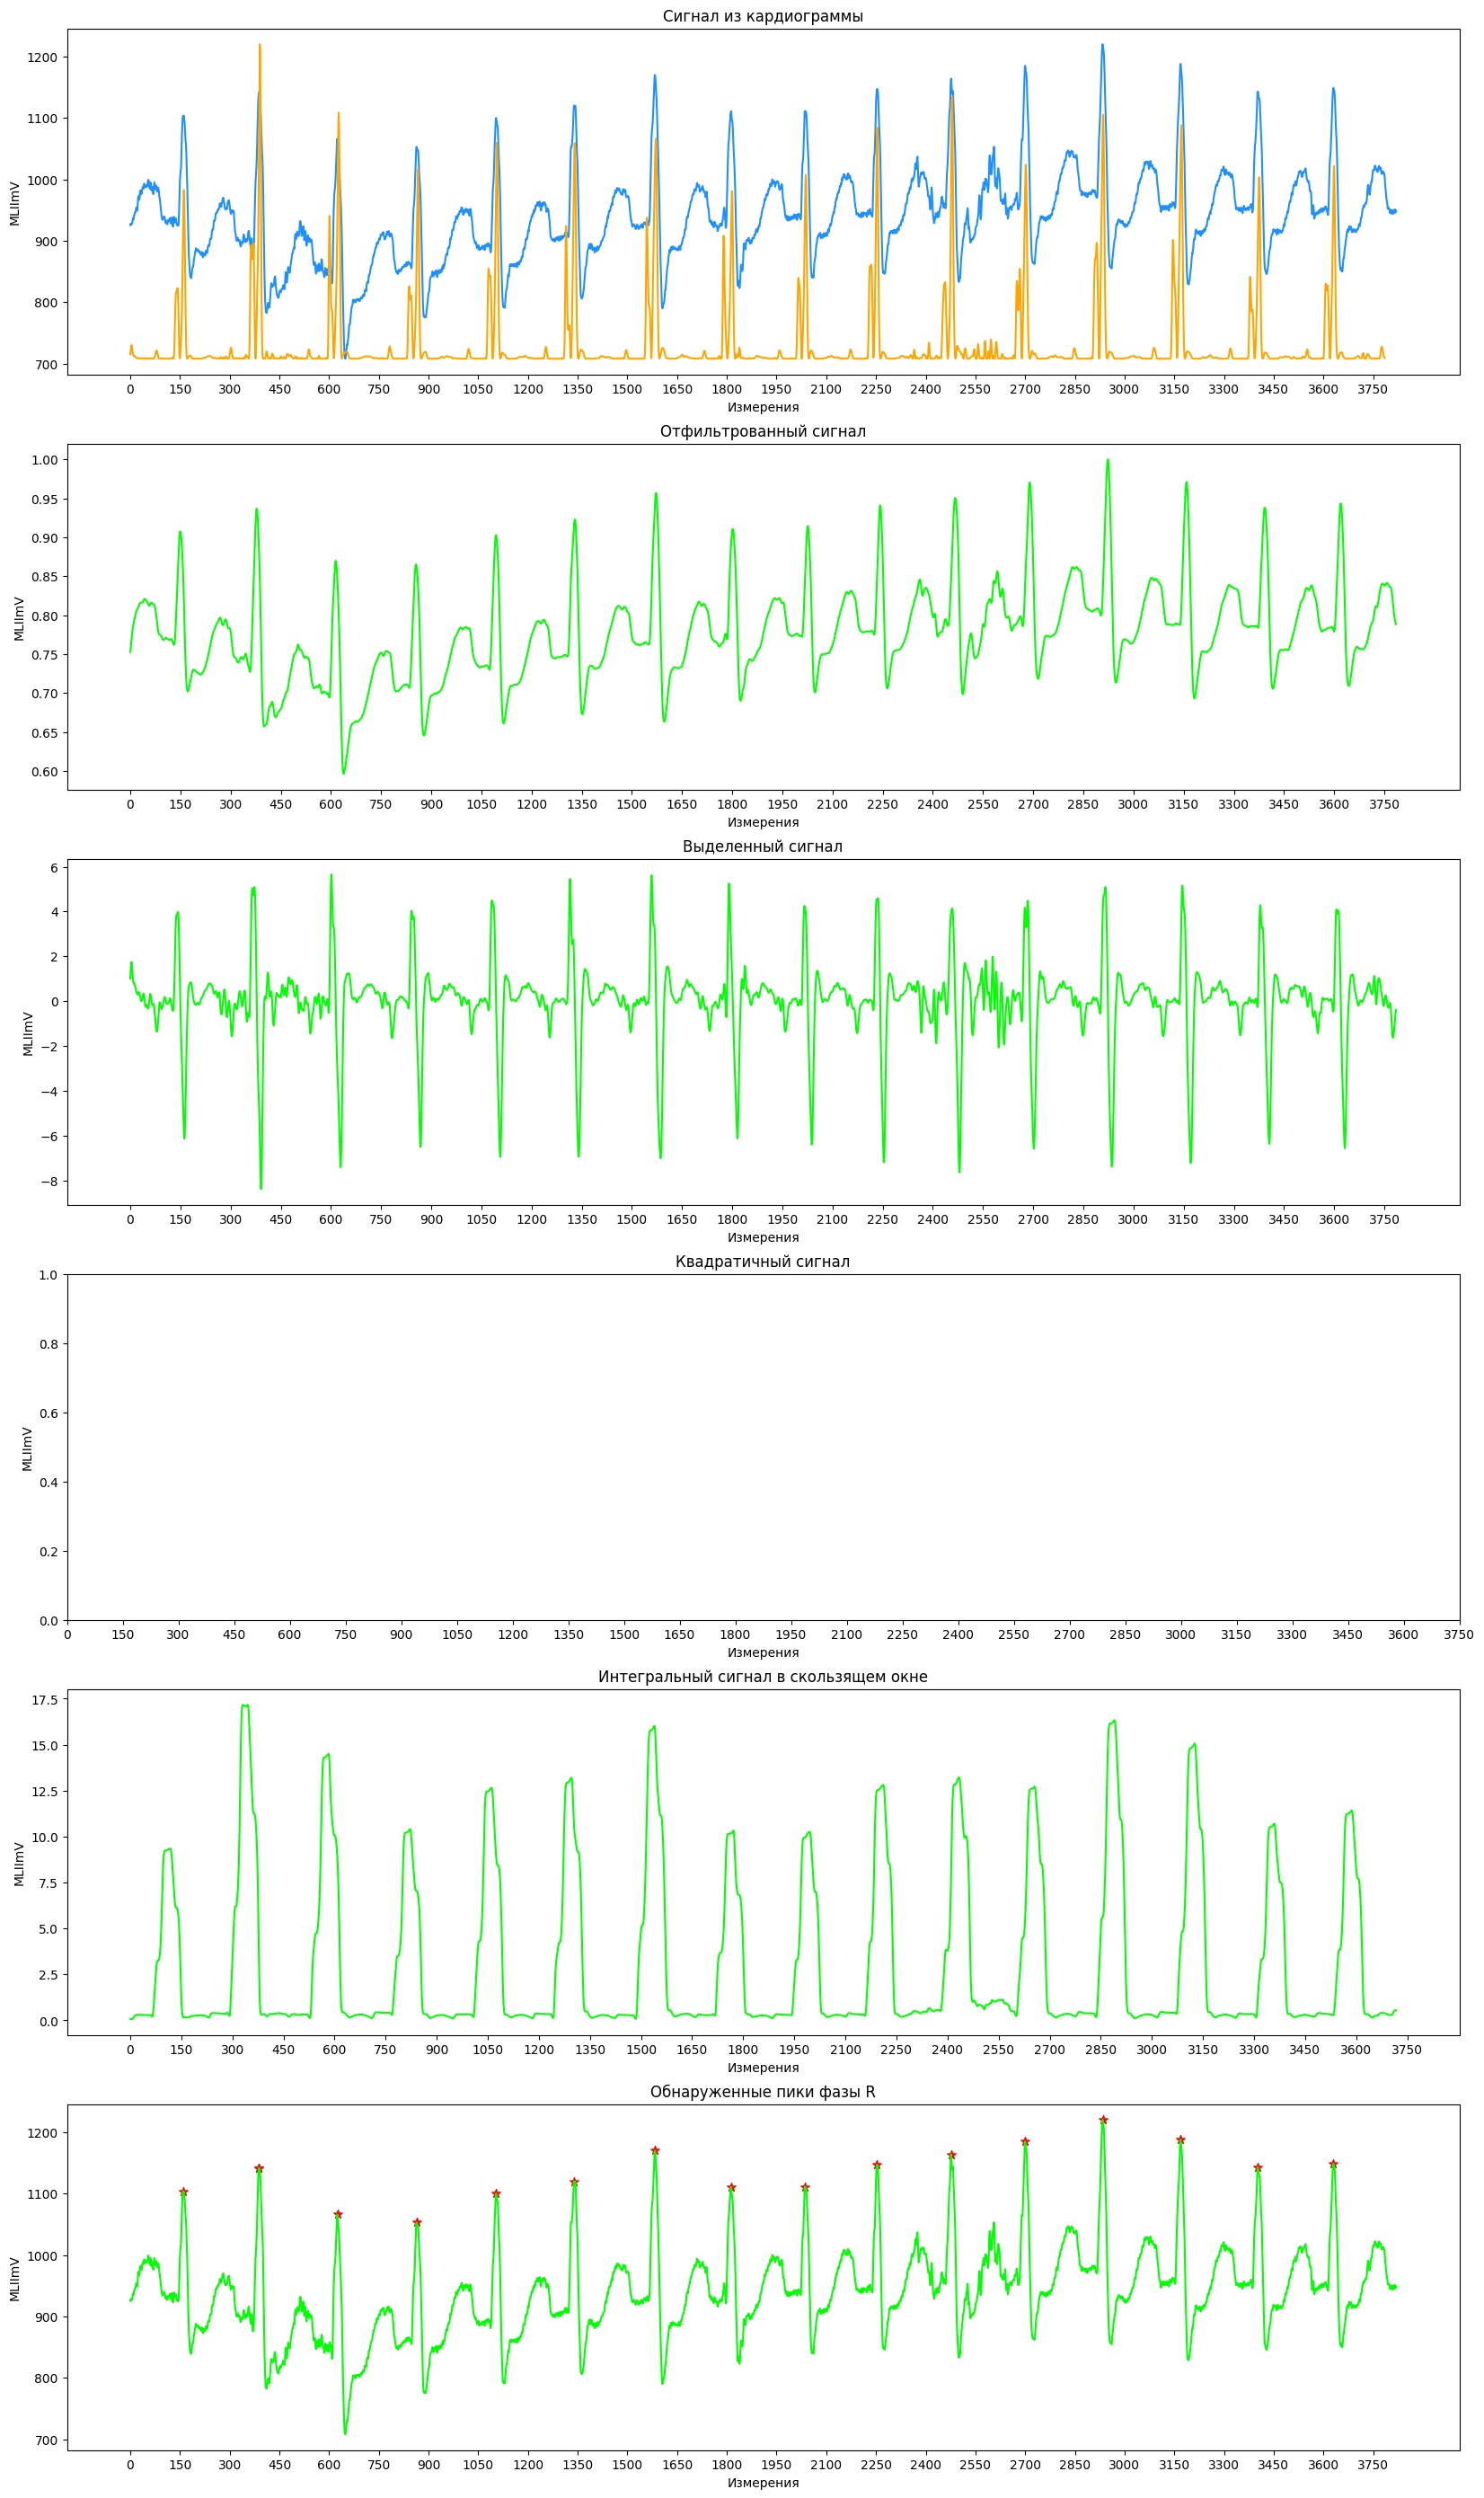

In [81]:
# Creating subplots for the required signals
fig, (axis0, axis1, axis2, axis3, axis4, axis5) = plt.subplots(nrows=6, figsize = (20,35), dpi = 100)

# Plotting original ECG signal
axis0.xaxis.set_ticks(np.arange(0, len(ecg)+1, 150))
axis0.plot(ecg.iloc[:,1], color = 'dodgerblue')
axis0.set_title("Сигнал из кардиограммы")
axis0.set_xlabel('Измерения')
axis0.set_ylabel('MLIImV')

# Plotting bandpassed signal
axis1.xaxis.set_ticks(np.arange(0, len(bpass)+1, 150))
axis1.plot(bpass[32:len(bpass)-2], color = 'lime')
axis1.set_title("Отфильтрованный сигнал")
axis1.set_xlabel('Измерения')
axis1.set_ylabel('MLIImV')

# Plotting derived signal
axis2.xaxis.set_ticks(np.arange(0, len(der)+1, 150))
axis2.plot(der[32:len(der)-2], color = 'lime')
axis2.set_title("Выделенный сигнал")
axis2.set_xlabel('Измерения')
axis2.set_ylabel('MLIImV')

# Plotting squared signal
axis3.xaxis.set_ticks(np.arange(0, len(sqr)+1, 150))
axis0.plot(sqr[32:len(sqr)-2]*sqr_coeff+sqr_offset, color = 'orange')
axis3.set_title("Квадратичный сигнал")
axis3.set_xlabel('Измерения')
axis3.set_ylabel('MLIImV')

# Plotting moving window integrated signal
axis4.xaxis.set_ticks(np.arange(0, len(mwin)+1, 150))
axis4.plot(mwin[100:len(mwin)-2], color = 'lime')
axis4.set_title("Интегральный сигнал в скользящем окне")
axis4.set_xlabel('Измерения')
axis4.set_ylabel('MLIImV')

# Plotting R peak locations
axis5.xaxis.set_ticks(np.arange(0, len(signal)+1, 150))
axis5.plot(signal, color = 'lime')
axis5.scatter(result, signal[result], color = 'red', s = 50, marker= '*')
axis5.set_title("Обнаруженные пики фазы R")
axis5.set_xlabel('Измерения')
axis5.set_ylabel('MLIImV')